In [80]:
from google.colab import drive
from google.colab import files
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import random
from scipy.io import loadmat

# Defininindo o caminho raiz do Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ITEM 1

## Montando o drive e definindo o caminho principal para a pasta em que está a base de dados. Além disso, carregou-se a base de dados numa variável `df`.

In [81]:
# Definindo o caminho padrão para a pasta que contém o projeto e a base de dados
# Caso dê erro neste ponto, por gentileza, me informar, para que
# eu possa compartilhar corretamente a pasta.

BASE_DIR = '/content/drive/MyDrive/ITA - Pessoal/8º Semestre/ET-287/Projetos/Projeto 3'
os.chdir(BASE_DIR)
os.listdir(BASE_DIR)

# Carregar o arquivo do dataset
df = pd.read_csv('faults.csv')
print(df.shape)  # Mostrando a dimensão da base de dados
df.head()  # Mostrando as primeiras linhas da base de dados


(1941, 34)


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


## Primeiras manipulações: salvando um array X com as 27 primeiras colunas e, em Y, as demais 7.

In [82]:
# Arrays com os valores por coluna
X = df.iloc[:, :27].values
Y = df.iloc[:, 27:].values
print(X)
print(Y)

[[ 4.200000e+01  5.000000e+01  2.709000e+05 ...  8.182000e-01
  -2.913000e-01  5.822000e-01]
 [ 6.450000e+02  6.510000e+02  2.538079e+06 ...  7.931000e-01
  -1.756000e-01  2.984000e-01]
 [ 8.290000e+02  8.350000e+02  1.553913e+06 ...  6.667000e-01
  -1.228000e-01  2.150000e-01]
 ...
 [ 1.450000e+02  1.740000e+02  3.867790e+05 ... -4.828000e-01
   5.200000e-03  7.079000e-01]
 [ 1.370000e+02  1.700000e+02  4.224970e+05 ... -6.060000e-02
  -1.710000e-02  9.919000e-01]
 [ 1.261000e+03  1.281000e+03  8.795100e+04 ... -2.000000e-01
  -1.139000e-01  5.296000e-01]]
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [83]:
# Listas com os nomes das colunas para consulta
X_columns = list(df.columns[:27])
Y_columns = list(df.columns[27:])
print(X_columns)
print(Y_columns)

['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas']
['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']


# ITEM 2

## Análise exploratória dos dados

In [84]:
# Verificando se há dados faltantes. Se o resultado for nulo, não há dados faltantes.
df.isnull().sum()

,0
X_Minimum,0
X_Maximum,0
Y_Minimum,0
Y_Maximum,0
Pixels_Areas,0
X_Perimeter,0
Y_Perimeter,0
Sum_of_Luminosity,0
Minimum_of_Luminosity,0
Maximum_of_Luminosity,0


In [85]:
# Verificando se há dados não numéricos
print(df.dtypes)
print(df.isna().sum())

X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
TypeOfSteel_A300           int64
TypeOfSteel_A400           int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
Pastry                     int64
Z_Scratch                  int64
K_Scatch                   int64
Stains    

Pastry            8.14%
Z_Scratch         9.79%
K_Scatch         20.14%
Stains            3.71%
Dirtiness         2.83%
Bumps            20.71%
Other_Faults     34.67%
dtype: object


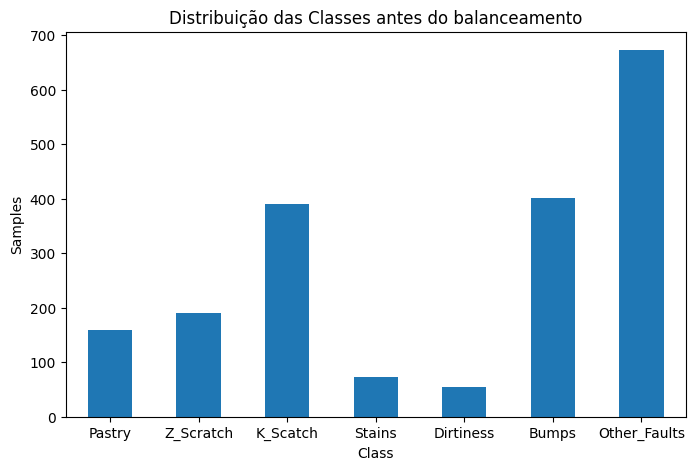

In [86]:
# Verificando o balanceamento da base de dados
classes_frequency = (df[Y_columns].sum() / len(df)) * 100
print(classes_frequency.apply(lambda x: f"{x: .2f}%"))

# plotando um gráfico para melhor visualização
class_counts = df[Y_columns].sum()
plt.figure(figsize=(8,5))
plt.title("Distribuição das Classes antes do balanceamento")
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Samples')
plt.xticks(rotation=0)
plt.show()

In [87]:
# Verificando a descrição dos dados
print(df[X_columns].describe())

# Verificando a presença de outliers
#===========================================>>>>> # DESCOMENTAR ANTES DE ENTREGAR
# Boxplot conjunto para as colunas de entrada
#df[X_columns].plot(kind='box', figsize=(17,8), rot=90)
#plt.title("Boxplot das features de entrada")
#plt.ylabel("Valores")
#plt.show()

# Boxplot para cada uma das colunas de entrada
#for col in X_columns:
#    plt.figure(figsize=(8,5))
#    sns.boxplot(x=df[col])
#    plt.title(f"Boxplot da coluna {col}")
#    plt.show()


         X_Minimum    X_Maximum     Y_Minimum     Y_Maximum   Pixels_Areas  \
count  1941.000000  1941.000000  1.941000e+03  1.941000e+03    1941.000000   
mean    571.136012   617.964451  1.650685e+06  1.650739e+06    1893.878413   
std     520.690671   497.627410  1.774578e+06  1.774590e+06    5168.459560   
min       0.000000     4.000000  6.712000e+03  6.724000e+03       2.000000   
25%      51.000000   192.000000  4.712530e+05  4.712810e+05      84.000000   
50%     435.000000   467.000000  1.204128e+06  1.204136e+06     174.000000   
75%    1053.000000  1072.000000  2.183073e+06  2.183084e+06     822.000000   
max    1705.000000  1713.000000  1.298766e+07  1.298769e+07  152655.000000   

        X_Perimeter   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
count   1941.000000   1941.000000       1.941000e+03            1941.000000   
mean     111.855229     82.965997       2.063121e+05              84.548686   
std      301.209187    426.482879       5.122936e+05        

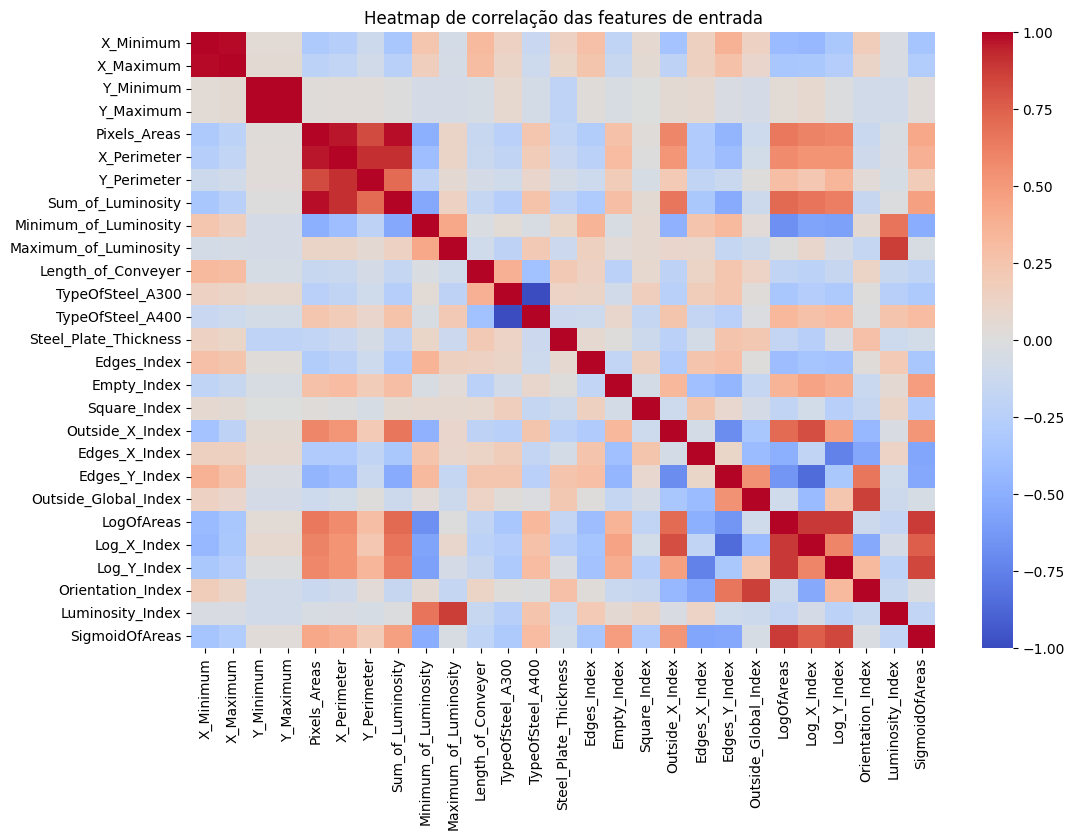

Features com alta correlação possíveis de serem excluídas: ['X_Maximum', 'Y_Maximum', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'TypeOfSteel_A400'] 




In [88]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalizando os dados de entrada
#scaler_norm = MinMaxScaler()
#X_normalized = scaler_norm.fit_transform(df[X_columns])

# PADRONIZANDO OS DADOS DE ENTRADA
scaler_std = StandardScaler()
X_standardized = scaler_std.fit_transform(df[X_columns])

# Verificação do heatmap e dos dados que têm correlação maior que 0.9
corr = df[X_columns].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap='coolwarm', cbar=True)
plt.title("Heatmap de correlação das features de entrada")
plt.show()

# Verificando features para excluir e reduzir a dimensionalidade do vetor de entradas
corr_mtx = corr.abs()
upper = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Features com alta correlação possíveis de serem excluídas:", to_drop, "\n\n")



In [89]:
# Aplicando o método SelectKBest para separar as 20 melhores features
from sklearn.feature_selection import SelectKBest, f_classif

# Converter one-hot -> label simples
y_labels = np.argmax(Y, axis=1)

# Criar o seletor SelectKBest
selector = SelectKBest(score_func=f_classif, k=20)

# Ajustar e transformar os dados
X_selected = selector.fit_transform(X_standardized, y_labels)

# Verificar as que foram escolhidas
selected_features = [col for col, mask in zip(X_columns, selector.get_support()) if mask]
print("Features selecionadas (20 melhores):")
print(selected_features, "\n\n")

# Inspecionar valores padronizados nas 20 features escolhidas
df_selected = pd.DataFrame(X_selected, columns=selected_features)
print(df_selected.head(), "\n\n")

# Atualizar arrays X e Y com as features escolhidas
X_selected = df_selected[selected_features].values
Y_selected = df[Y_columns].values

# Atualizar listas de colunas
X_new_columns = selected_features
Y_new_columns = Y_columns

# Verificar
print(X_selected, "\n")
print(Y_selected, "\n")
print(X_new_columns, "\n")
print(Y_new_columns, "\n")

Features selecionadas (20 melhores):
['X_Minimum', 'X_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Square_Index', 'Outside_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'SigmoidOfAreas'] 


   X_Minimum  X_Maximum  Pixels_Areas  X_Perimeter  Sum_of_Luminosity  \
0  -1.016481  -1.141639     -0.314852    -0.314996          -0.355537   
1   0.141894   0.066403     -0.345623    -0.338242          -0.380574   
2   0.495362   0.436253     -0.352784    -0.344883          -0.387261   
3   0.541467   0.486504     -0.332463    -0.328279          -0.365736   
4   1.379032   1.382988      0.099692    -0.172201           0.079307   

   Minimum_of_Luminosity  Length_of_Conveyer  TypeOfSteel_A300  \
0              -0.266099            1.576303          1.223956   
1              -0.017079

In [94]:
# Aplicação da técnica SMOTE (Synthetic Minority Over-sampling Technique) para
# balanceamento dos dados
"""
Essa técnica gera novos exemplos sintéticos da(s) classe(s) minoritária(s) a
partir da combinação dos existentes. É mais sofisticado que simplesmente usar
over-sampling ou under-sampling (pois pode acarretar perda de informação), e
reduz o risco de overfitting.
"""
from imblearn.over_sampling import SMOTE
from tensorflow.keras.utils import to_categorical

# y_labels já foi criado
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y_labels)

# Convertendo novamente para one-hot
Y_resampled = to_categorical(y_resampled, num_classes=len(Y_new_columns))

# Verificando o balanceamento
print("Distribuição por classe (%), via rótulos:")
print((pd.Series(y_resampled).value_counts(normalize=True) * 100).sort_index().round(2), "\n\n")

# Visualizar amostra dos dados padronizados e balanceados
df_resampled = pd.DataFrame(X_resampled, columns=X_new_columns)
print(df_resampled.head())

print("Médias:", df_resampled.mean().round(2).tolist())
print("Desvios:", df_resampled.std().round(2).tolist())
df_resampled.head()

Distribuição por classe (%), via rótulos:
0    14.29
1    14.29
2    14.29
3    14.29
4    14.29
5    14.29
6    14.29
Name: proportion, dtype: float64 


   X_Minimum  X_Maximum  Pixels_Areas  X_Perimeter  Sum_of_Luminosity  \
0  -1.016481  -1.141639     -0.314852    -0.314996          -0.355537   
1   0.141894   0.066403     -0.345623    -0.338242          -0.380574   
2   0.495362   0.436253     -0.352784    -0.344883          -0.387261   
3   0.541467   0.486504     -0.332463    -0.328279          -0.365736   
4   1.379032   1.382988      0.099692    -0.172201           0.079307   

   Minimum_of_Luminosity  Length_of_Conveyer  TypeOfSteel_A300  \
0              -0.266099            1.576303          1.223956   
1              -0.017079            1.576303          1.223956   
2               0.449832            1.133521          1.223956   
3               0.449832           -0.734467         -0.817023   
4              -1.480069           -0.734467         -0.817023   

   TypeOf

,X_Minimum,X_Maximum,Pixels_Areas,X_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Square_Index,Outside_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,SigmoidOfAreas
0,-1.016481,-1.141639,-0.314852,-0.314996,-0.355537,-0.266099,1.576303,1.223956,-1.223956,0.022920,-0.940864,-1.435364,-0.486227,0.796401,0.879804,-0.083538,-0.898437,0.528872,1.467656,-0.009490
1,0.141894,0.066403,-0.345623,-0.338242,-0.380574,-0.017079,1.576303,1.223956,-1.223956,0.022920,1.445043,-1.342740,-0.504888,0.654223,0.879804,-0.581936,-1.157841,0.130174,1.417530,-0.845759
2,0.495362,0.436253,-0.352784,-0.344883,-0.387261,0.449832,1.133521,1.223956,-1.223956,0.386082,2.133548,-0.876299,-0.503191,0.571820,0.879804,-0.812814,-1.157841,-0.325764,1.165103,-1.091513
3,0.541467,0.486504,-0.332463,-0.328279,-0.365736,0.449832,-0.734467,-0.817023,0.817023,3.836121,1.324897,-1.532047,-0.477744,0.796401,0.879804,-0.313021,-1.018897,0.550227,1.519978,-0.189237
4,1.379032,1.382988,0.099692,-0.172201,0.079307,-1.480069,-0.734467,-0.817023,0.817023,1.929520,-0.875117,-1.861950,-0.352206,0.747301,0.879804,1.127655,-0.218461,2.216130,1.698514,1.221636


i) **A base de dados é consistente?**
- R.: Sim, é consistente. Ela é composta por 27 colunas que detalham características da chapa e mais 7 que classificam o defeito da chapa, com base nas características anotadas.

ii) **Há dados faltantes?**
- R.: Não há dados faltantes.

iii) **Há dados não numéricos?**
- R.: Não, todos os dados são do tipo float ou int.

iv) **A base de dados é balanceada? Opcional: Aplique uma técnica de balanceamento dos dados**
- R.: Pode-se dizer que ela é pouco balanceada. Numa base de dados com 7 classes, esperar-se-ia que a porcentagem de cada classe girasse em torno de 14%. Todavia, há 2 classes que têm bem menos amostras que as demais (Dirtness e Stains) e, das outras restantes, há 3 classes (Other_faults, Bumps e K_Scatch), que concentram boa parte da base de dados (mais de 75%), podendo levar um modelo futuro de classificação a overfitting ou underfitting. Dessa forma, foi aplicada a técnica de SMOTE(Synthetic Minority Over-sampling Technique) para balancear os dados.

v) **As variáveis assumem valores plausíveis? Como é a distribuição de dados? Há outliers? Faça boxplts e comente.**
- R.: Sim,em geral, os valores são plausíveis para as classes. Contudo, a distribuição de dados pelas classes não está balanceada, como visto acima, pois 3 classes ocupam mais de 75% dos dados. Além disso, como se nota pelos bloxpots, há muitos outliers em algumas classes, o que pode prejudicar o treinamento do modelo. Não obstante, algumas classes têm valores bem discrepantes de amostras (como Pixels_Areas, X_Perimeter e Y_Perimeter)

vi) **Há necessidade de normalizar ou padronizar as variáveis de entrada? Justifique.**
- R.: Em geral, modelos de Machine Learning se beneficiam da normalização e da padronização quando há features com escalas muitos discrepantes (como é o caso da base de dados em questão). Dessa forma, pode-se fazer a limpeza de dados em algumas features que não são tão relevantes para o treinamento (como Outside_Global_Index) e normalizar/padronizar outras com escalas muito diferentes (como Y_Minimum,Y_Maximum, etc). Sendo assim, para a base de dados atual, efetuaremos a **padronização**, já que normalização beneficia classificação binária, e nosso modelo pede 1 classe em 7 como output.

vii) **Opcional: Analise o heatmap das variáveis e proponha uma estratégia para reduzir as variáveis de entrada sem perda de informação útil para o classificador.**
- R.: Analisando o heatmap, uma abordagem possível é excluir variáveis cuja correlação signifique redundância de dados. Em geral, variáveis com correlação maior que 0.9 podem ser candidatas para exclusão (uma das duas).  Não obstante, a biblioteca `sklearn` tem métodos para encontrar as melhores features, como `SelectKBest`, `f_classif`, etc. Escolheremos, para este projeto, as 20 melhores features (≈ 75%), por meio do método `SelectKBest`.




# ITEM 3

## Particionar aleatoriamente 70% das amostras para treinar a rede MLP e os 30% restantes, para validação

In [105]:
# Particionando o dataset para treinamento
from sklearn.model_selection import train_test_split

# Dividir: 70% treino, 30% validação
X_train, X_valid, Y_train, Y_valid = train_test_split(X_resampled,
                                                      Y_resampled,
                                                      test_size=0.3,
                                                      random_state=42,
                                                      stratify=y_resampled
)

# Verificar se a proporção foi mantida
print("Distribuição treino:")
print(X_train.shape, Y_train.shape)
print("Distribuição validação:")
print(X_valid.shape, Y_valid.shape)

#

Distribuição treino:
(3297, 20) (3297, 7)
Distribuição validação:
(1414, 20) (1414, 7)


#ITEM 4

## Implementação da Rede MLP

In [106]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import accuracy_score

# Criando a Rede Neural MLP
# Testaremos o modelo para 4 camadas, com Leak-ReLU,
model = Sequential()

# Primeira Camada - Entrada
model.add(Dense(128, kernel_initializer='he_normal', input_shape=(X_train.shape[1],)))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Segunda Camada - Oculta
model.add(Dense(64, activation='leaky_relu', kernel_initializer='he_normal'))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Terceira Camada - Oculta
model.add(Dense(32, activation='leaky_relu', kernel_initializer='he_normal'))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Quarta Camada - Saída
model.add(Dense(len(Y_new_columns), activation='softmax'))

print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,151 (55.28 KB)

 Trainable params: 13,703 (53.53 KB)

 Non-trainable params: 448 (1.75 KB)

None


In [107]:
# Compilando a Rede Neural
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [108]:
# Parâmetros de callbacks
es = EarlyStopping(monitor='val_loss',
                   patience=10,
                   verbose=1,
                   restore_best_weights=True
)

rlrp = ReduceLROnPlateau(monitor='val_loss',
                         factor=0.5,
                         patience=5,
                         verbose=1,
                         min_lr = 1e-6
)

mcheckp = ModelCheckpoint('best_mlp.keras',
                          monitor='val_loss',
                          save_best_only=True,
                          verbose=1
)

In [109]:
# Treinamento da Rede Neural
model.fit(X_train,
          Y_train,
          validation_data=(X_valid, Y_valid),
          epochs=100,
          batch_size=32,
          callbacks=[es, rlrp, mcheckp],
          shuffle=True
)

Epoch 1/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3723 - loss: 1.8380
Epoch 1: val_loss improved from inf to 0.98629, saving model to best_mlp.keras
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.3733 - loss: 1.8350 - val_accuracy: 0.6867 - val_loss: 0.9863 - learning_rate: 0.0010
Epoch 2/100
 96/104 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6269 - loss: 1.0851
Epoch 2: val_loss improved from 0.98629 to 0.78734, saving model to best_mlp.keras
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6283 - loss: 1.0829 - val_accuracy: 0.7560 - val_loss: 0.7873 - learning_rate: 0.0010
Epoch 3/100
 98/104 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6755 - loss: 0.9668
Epoch 3: val_loss improved from 0.78734 to 0.69458, saving model to best_mlp.keras
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6760 - loss: 0.9647 - val_accuracy: 0.7815 - val_loss: 0.6946 - learning_rate: 0.0010
Epoch 4/100
102/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6

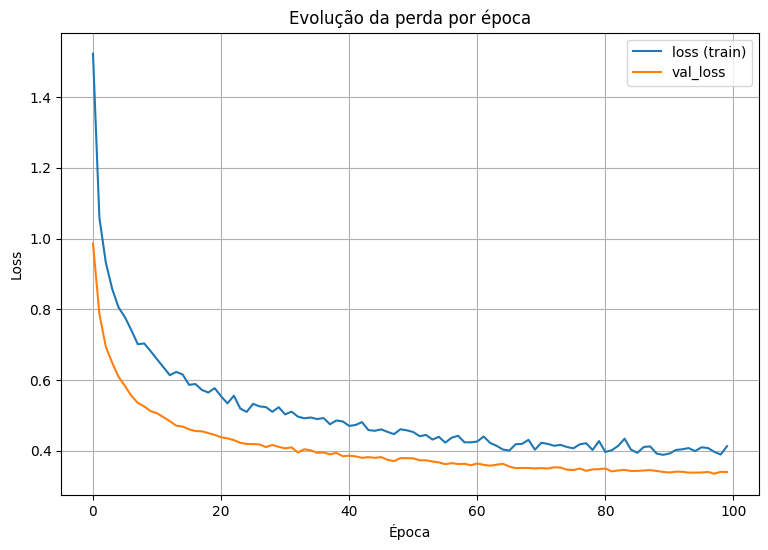

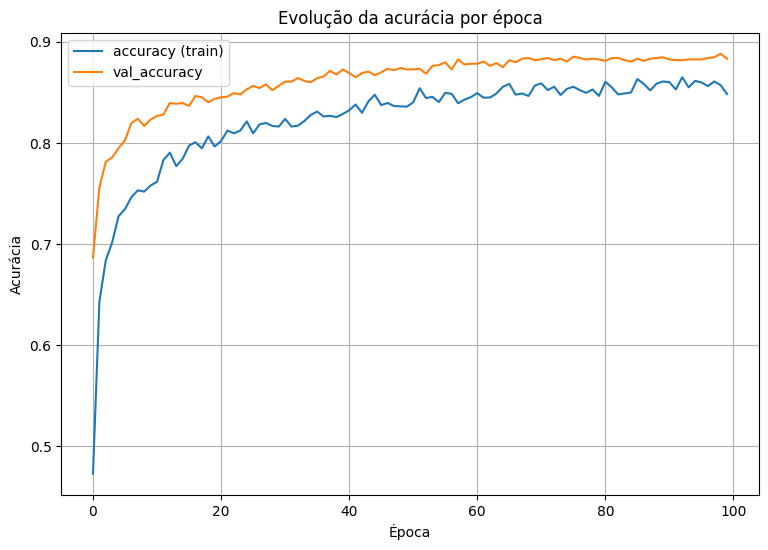

In [121]:
# Gráfico de loss

plt.figure(figsize=(9,6))
plt.plot(model.history.history['loss'], label='loss (train)')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.title('Evolução da perda por época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de Accuracy
plt.figure(figsize=(9,6))
plt.plot(model.history.history['accuracy'], label='accuracy (train)')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.title('Evolução da acurácia por época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8942 - loss: 0.3257
Val_loss: 0.3354 --- Val_acc: 0.8847
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy (val): 0.8847241867043847

Classification Report:
              precision    recall  f1-score   support

      Pastry      0.819     0.941     0.876       202
   Z_Scratch      0.893     0.995     0.941       202
    K_Scatch      0.974     0.946     0.960       202
      Stains      0.971     0.990     0.980       202
   Dirtiness      0.975     0.980     0.978       202
       Bumps      0.745     0.812     0.777       202
Other_Faults      0.811     0.530     0.641       202

    accuracy                          0.885      1414
   macro avg      0.884     0.885     0.879      1414
weighted avg      0.884     0.885     0.879      1414


Confusion Matrix:


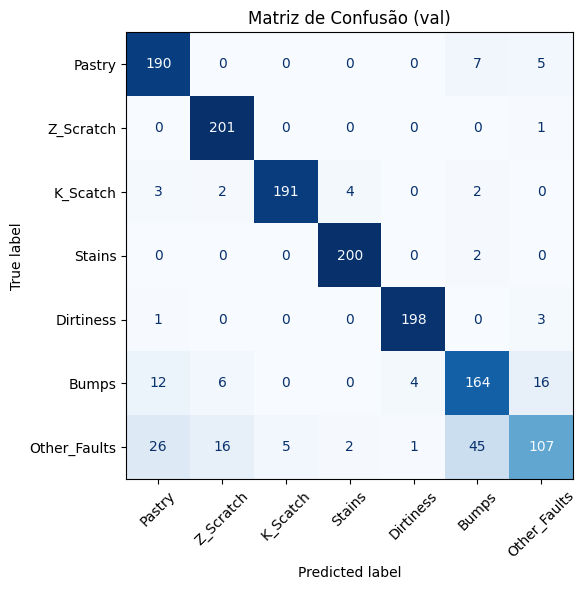

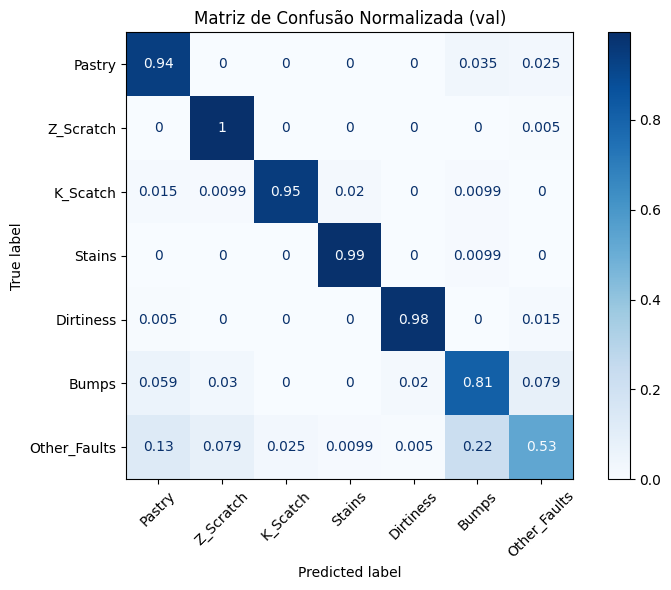

In [122]:
# Validação do modelo de Rede Neural
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# AValiação do modelo
val_loss, val_acc = model.evaluate(X_valid, Y_valid)
print(f"Val_loss: {val_loss:.4f} --- Val_acc: {val_acc:.4f}")

predictions = model.predict(X_valid)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(Y_valid, axis=1)

print("Accuracy (val):", accuracy_score(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=Y_new_columns, digits=3))

# MAtriz de confusão
cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Y_new_columns)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax, xticks_rotation=45, cmap='Blues', colorbar=False)
plt.title("Matriz de Confusão (val)")
plt.tight_layout()
plt.show()

# Matriz de confusão normalizada por linha (taxa de acertos/erros por classe)
cm_norm = confusion_matrix(y_true, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=Y_new_columns)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax, xticks_rotation=45, cmap='Blues', colorbar=True)
plt.title("Matriz de Confusão Normalizada (val)")
plt.tight_layout()
plt.show()


# ITEM 5
## Algumas considerações

i) **Como a complexidade do modelo impacta no desempenho?**  
- R.:  Em geral, redes neurais rasas tendem a não performar bem em dados complexos. Como a base de dados é complexa, optou-se por uma rede neural de 4 camadas, a fim de conseguir capturar melhor as nuances do problema e, dessa forma, obter melhores resultados de predição. Em resumo, a complexidade da rede deve aumentar conforme aumenta a complexidade dos dados (além de levar em consideração outros fatores, tais como a escolha consciente de hiperparâmetros, etc). Não obstante, nosso modelo obteve uma boa performance no final, conseguindo acurácia de cerca de 89%, com apenas 100 épocas. Caso houvesse uma base de dados maior e melhor distribuída,é possível que o modelo performasse melhor ainda.


ii) **Comente sobre a estratégia de ajuste dos hiper parâmetros adotada para ajustar o modelo.**  
- R.: O ajuste dos hiperparâmetros foi feito de maneira automática pelas ferramentas presentes no framework Keras. Utilizou-se:
- EarlyStopping:interrompe o treinamento quando a métrica monitorada para de melhorar por um número de épocas;
- ReduceLROnPlateau: reduz o learning rate quando a métrica monitorada entra em platô;
- ModelCheckPoint: Salva o melhor modelo (ou todos) em disco durante o treino.

Os demais parâmetros foram escolhidos com base no que é praticado comumente em modelos de machine learning (número de épocas, tipo de otimizador, batch normalization, shuffles, etc.).


iii) **Como a quantidade de amostras de cada classe pode influenciar no desempenho da rede neural?**  
- R.: A quantidade de amostras, bem como a sua distribuição, são cruciais, pois o modelo depende delas para treinar satisfatoriamente. Quando as classes têm quantidades muito diferentes de amostras, a rede tende a “aprender” o que mais aparece: o gradiente médio da loss fica dominado pela classe majoritária, as atualizações de peso passam a favorecê-la e a fronteira de decisão é deslocada, resultando em alto acerto global (accuracy) enganoso e baixo recall para as classes raras. Com poucas amostras, as classes minoritárias sofrem alta variância: o modelo facilmente superajusta (memoriza casos específicos) e generaliza mal, além de produzir probabilidades mal calibradas (scores inflados para a classe comum e subestimados para as raras). Na base de dados em que trabalhamos, foi justamente essa discrepância que foi observada. Dessa forma, tentou-se contornar o problema aplicando o balanceamento pelo método SMOTE.

iv) **Quais variáveis de entrada são mais relevantes para o problema?**  
- R.: De acordo com a seleção feita durante a manipulação dos dados, as 20 features mais relevantes foram as que seguem abaixo:


In [123]:
for column in X_new_columns:
    print(column)

X_Minimum
X_Maximum
Pixels_Areas
X_Perimeter
Sum_of_Luminosity
Minimum_of_Luminosity
Length_of_Conveyer
TypeOfSteel_A300
TypeOfSteel_A400
Steel_Plate_Thickness
Edges_Index
Square_Index
Outside_X_Index
Edges_Y_Index
Outside_Global_Index
LogOfAreas
Log_X_Index
Log_Y_Index
Orientation_Index
SigmoidOfAreas
